In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

base=pd.read_csv('BSinfo.csv')
cell=pd.read_csv('CLdata.csv')
energy=pd.read_csv('ECdata.csv')
submit=pd.read_csv("PCprediction.csv")

base['BS'] = base['BS'].str.replace('B_', '')
base['CellName'] = base['CellName'].str.replace('Cell', '')
base['RUType'] = base['RUType'].str.replace('Type', '')
base['Mode'] = base['Mode'].str.replace('Mode', '')

cell['BS'] = cell['BS'].str.replace('B_', '')
cell['CellName'] = cell['CellName'].str.replace('Cell', '')
cell['Time'] = pd.to_datetime(cell['Time'])

energy['BS'] = energy['BS'].str.replace('B_', '')
energy['Time'] = pd.to_datetime(energy['Time'])

merged_df = pd.merge(energy, cell, on=['Time', 'BS'], how='left')
final = pd.merge(merged_df, base,  on=['BS', 'CellName'], how='left')
final['Time']=final['Time'].values.astype(float).reshape(-1, 1)  # Convert datetime to float and reshape

x=final
y=x.pop(item='Energy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are scaled versions of the training and testing data


# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate the Weighted Mean Absolute Percentage Error (WMAPE)
def wmape(y_true, y_pred):
    weights = np.abs(y_true)
    wmape = np.sum(np.abs(y_true - y_pred) / weights) * 100.0 / np.sum(weights)
    return wmape

wmape_score = wmape(y_test, y_pred)
print("WMAPE:", wmape_score)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

WMAPE: 0.6861249619111771
R-squared: 0.7623472360057131
Mean Squared Error: 48.83985266814597
Mean Absolute Error: 5.010667001298484


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

base=pd.read_csv('BSinfo.csv')
cell=pd.read_csv('CLdata.csv')
energy=pd.read_csv('ECdata.csv')
submit=pd.read_csv("PCprediction.csv")

base['BS'] = base['BS'].str.replace('B_', '')
base['CellName'] = base['CellName'].str.replace('Cell', '')
base['RUType'] = base['RUType'].str.replace('Type', '')
base['Mode'] = base['Mode'].str.replace('Mode', '')

cell['BS'] = cell['BS'].str.replace('B_', '')
cell['CellName'] = cell['CellName'].str.replace('Cell', '')
cell['Time'] = pd.to_datetime(cell['Time'])

energy['BS'] = energy['BS'].str.replace('B_', '')
energy['Time'] = pd.to_datetime(energy['Time'])

merged_df = pd.merge(energy, cell, on=['Time', 'BS'], how='left')
final = pd.merge(merged_df, base,  on=['BS', 'CellName'], how='left')
final['Time']=final['Time'].values.astype(float).reshape(-1, 1)  # Convert datetime to float and reshape

x=final
y=x.pop(item='Energy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are scaled versions of the training and testing data


# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate the Weighted Mean Absolute Percentage Error (WMAPE)
def wmape(y_true, y_pred):
    weights = np.abs(y_true)
    wmape = np.sum(np.abs(y_true - y_pred) / weights) * 100.0 / np.sum(weights)
    return wmape

wmape_score = wmape(y_test, y_pred)
print("WMAPE:", wmape_score)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

WMAPE: 0.2781228871798739
R-squared: 0.9329750836864842
Mean Squared Error: 13.774243492180128
Mean Absolute Error: 2.2994606809181324


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
energy = pd.read_csv('ECdata.csv')
submit = pd.read_csv("PCprediction.csv")

base['BS'] = base['BS'].str.replace('B_', '')
base['CellName'] = base['CellName'].str.replace('Cell', '')
base['RUType'] = base['RUType'].str.replace('Type', '')
base['Mode'] = base['Mode'].str.replace('Mode', '')

cell['BS'] = cell['BS'].str.replace('B_', '')
cell['CellName'] = cell['CellName'].str.replace('Cell', '')
cell['Time'] = pd.to_datetime(cell['Time'])

energy['BS'] = energy['BS'].str.replace('B_', '')
energy['Time'] = pd.to_datetime(energy['Time'])

merged_df = pd.merge(energy, cell, on=['Time', 'BS'], how='left')
final = pd.merge(merged_df, base, on=['BS', 'CellName'], how='left')
final['Time'] = final['Time'].values.astype(float).reshape(-1, 1)  # Convert datetime to float and reshape
print(final.dtypes)
# Convert specified columns from object to int
int_columns = ['BS', 'CellName', 'RUType', 'Mode']
final[int_columns] = final[int_columns].astype(int)


submit['Time'] = pd.to_datetime(submit['Time'])
print(submit.shape)
submit.drop(['w'], axis=1, inplace=True)
# Create the 'ID' column by joining 'Time' and 'BS' columns
submit['ID'] = submit['Time'].astype(str) + '_' + submit['BS']
submit['BS'] = submit['BS'].str.replace('B_', '')
submit['Time'] = submit['Time'].values.astype(float).reshape(-1, 1)  # Convert datetime to float and reshape
submit['BS'] = submit['BS'].astype(int)
submit = submit[['ID', 'Time', 'BS', 'Energy']]
test = submit[['ID', 'Time', 'BS', 'Energy']]

numeric_cols = ['CellName', 'load', 'ESMode1', 'ESMode2', 'ESMode3',
                'ESMode4', 'ESMode5', 'ESMode6', 'RUType', 'Mode', 'Frequency',
                'Bandwidth', 'Antennas', 'TXpower']
# grouped_df = final.groupby(["BS"])[numeric_cols].median().reset_index()
def calculate_median(group):
    numeric_group = group[numeric_cols]
    return pd.Series(np.median(numeric_group), index=numeric_cols)

grouped_df = final.groupby("BS")[numeric_cols].apply(calculate_median).reset_index()

print(grouped_df.shape)
grouped_df

# Merge 'test' with 'final' (excluding 'Time' column) on the 'BS' column using a left join
merged_df = test.merge(grouped_df, on='BS', how='left')

# Find median values for each column (excluding 'Time') in 'final' DataFrame
median_values = grouped_df.median()

# Fill missing values in merged DataFrame with median values
merged_df.fillna(median_values, inplace=True)
print(merged_df.shape)
merged_df

X_train = final
y_train = X_train.pop(item='Energy')

X_test = merged_df
X_test.pop(item="ID")
y_test = X_test.pop(item='Energy')

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

submit['Energy'] = y_pred
submit = submit[['ID', 'Energy']]
submit.to_csv('SampleSubmission__23_.csv', index=False)

In [3]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)



X_train_scaled shape: (78467, 16)
X_test_scaled shape: (19617, 16)
X_train_scaled shape: (78467, 16)
X_test_scaled shape: (19617, 16)


Epoch 1/50
3/3 [==============================] - 1s 7ms/step - loss: 0.0917
Epoch 2/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0563
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0386
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0319
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0299
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 8/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0230
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0218
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 0.0205
Epoch 12/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0194
Epoch 13/50
3/3 [==============================] - 0s 5ms/step - loss: 0

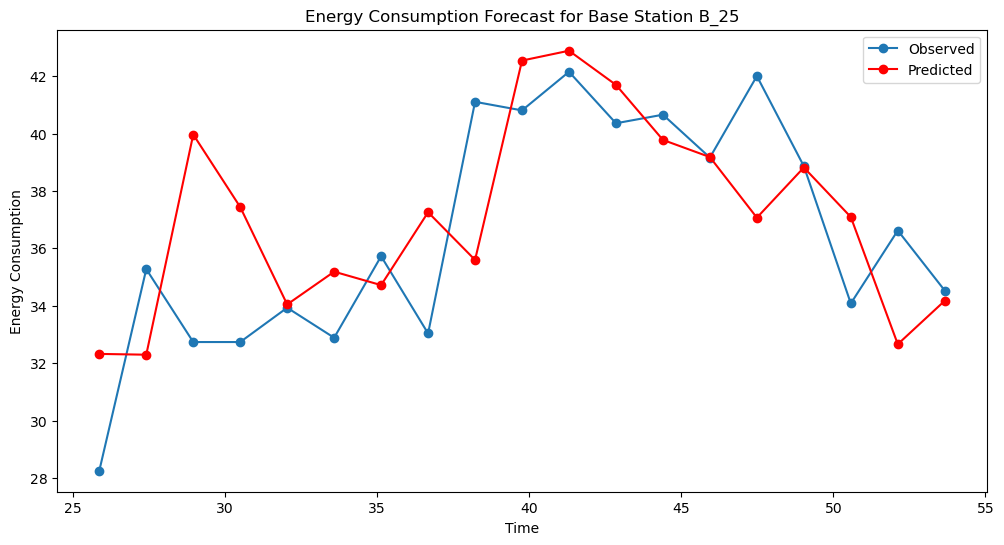

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('ECdata.csv')

# Convert 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Set 'Time' as the index
data.set_index('Time', inplace=True)

# List of unique base stations
base_stations = data['BS'].unique()

# Function to prepare data for RNN
def prepare_data(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i + n_steps])
        y.append(sequence[i + n_steps])
    return np.array(X), np.array(y)

bs='B_25'
bs_data = data[data['BS'] == bs]['Energy'].values
#bs_data = data

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bs_data.reshape(-1, 1))

# Record the minimum and maximum values of the original time data
time_min = bs_data.min()
time_max = bs_data.max()

# Prepare data for RNN
n_steps = 24  # Number of time steps in each input sequence
X, y = prepare_data(scaled_data, n_steps)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict using the model
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    
# Rescale time back to original values
time_values = np.linspace(time_min, time_max, len(y_test_original))

# Plot observed vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_values, y_test_original, label='Observed',marker='o')
plt.plot(time_values, y_pred_original, label='Predicted', color='red',marker='o')
plt.title(f'Energy Consumption Forecast for Base Station {bs}')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('ECdata.csv')

# Convert 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Set 'Time' as the index
data.set_index('Time', inplace=True)

# List of unique base stations
base_stations = data['BS'].unique()

# Function to prepare data for RNN
def prepare_data(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i + n_steps])
        y.append(sequence[i + n_steps])
    return np.array(X), np.array(y)

bs='B_0'
bs_data = data[data['BS'] == bs]['Energy'].values

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(bs_data.reshape(-1, 1))

# Record the minimum and maximum values of the original time data
time_min = bs_data.min()
time_max = bs_data.max()

# Prepare data for RNN
n_steps = 24  # Number of time steps in each input sequence
X, y = prepare_data(scaled_data, n_steps)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict using the model
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
    
# Rescale time back to original values
time_values = np.linspace(time_min, time_max, len(y_test_original))

# Plot observed vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_values, y_test_original, label='Observed',marker='o')
plt.plot(time_values, y_pred_original, label='Predicted', color='red',marker='o')
plt.title(f'Energy Consumption Forecast for Base Station {bs}')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 5421.4316
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 5355.9946
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 5286.0220
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 5191.6187
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 5035.1855
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 4696.2593
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 3845.8799
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1984.7460
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 760.1837
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1090.4518
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 385.6440
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 491.0531
Epoch 13/100
4/4 [==========

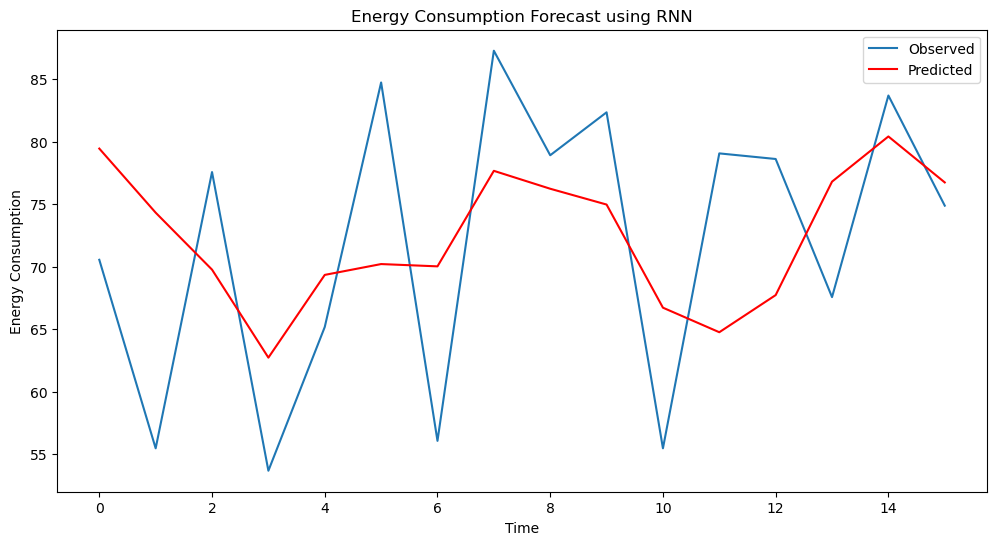

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess your data
base=pd.read_csv('BSinfo.csv')
cell=pd.read_csv('CLdata.csv')
energy=pd.read_csv('ECdata.csv')

base_cell=pd.merge(cell, base, on=['BS','CellName'], how='left')
base_cell_energy=pd.merge(base_cell, energy, on=['Time','BS'], how='inner')

base_cell_energy['BS'] = base_cell_energy['BS'].str.replace('B_', '')
base_cell_energy['CellName'] = base_cell_energy['CellName'].str.replace('Cell', '')
base_cell_energy['RUType'] = base_cell_energy['RUType'].str.replace('Type', '')
base_cell_energy['Mode'] = base_cell_energy['Mode'].str.replace('Mode', '')

base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])
base_cell_energy['Time'] = base_cell_energy['Time'].values.astype(float).reshape(-1, 1)  # Convert datetime to float and reshape

x=base_cell_energy[base_cell_energy['BS']=='0']
y=x.pop(item='Energy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of time steps in each input sequence
n_steps = 12

# Create sequences for RNN input and target values using indexing
X_train_rnn = [X_train_scaled[i:i+n_steps] for i in range(len(X_train_scaled) - n_steps + 1)]
y_train_rnn = y_train[n_steps - 1:]  # Align target values with sequences

X_test_rnn = [X_test_scaled[i:i+n_steps] for i in range(len(X_test_scaled) - n_steps + 1)]
y_test_rnn = y_test[n_steps - 1:]  # Align target values with sequences

# Convert sequences to numpy arrays
X_train_rnn = np.array(X_train_rnn)
y_train_rnn = np.array(y_train_rnn)

X_test_rnn = np.array(X_test_rnn)
y_test_rnn = np.array(y_test_rnn)

# Create a Sequential model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, X_train_scaled.shape[1])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_rnn, y_train_rnn, epochs=100, batch_size=32)

# Predict using the model
y_pred = model.predict(X_test_rnn)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test_rnn, y_pred)
print("Mean Squared Error:", mse)

# Plot observed vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rnn, label='Observed')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Energy Consumption Forecast using RNN')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


00:54:27 - cmdstanpy - INFO - Chain [1] start processing
00:54:27 - cmdstanpy - INFO - Chain [1] done processing


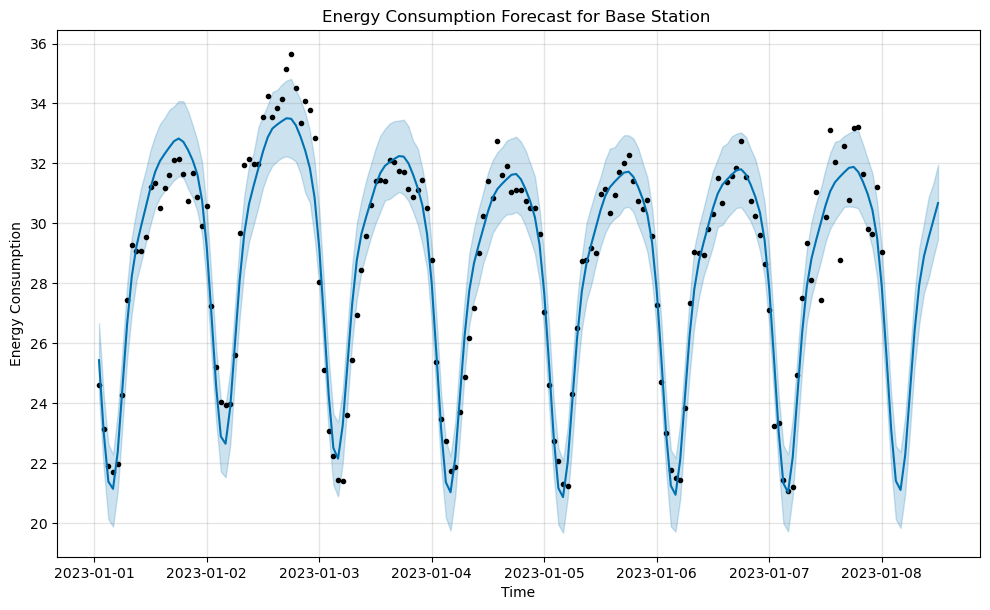

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load and preprocess your data
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
energy = pd.read_csv('ECdata.csv')

base_cell = pd.merge(cell, base, on=['BS', 'CellName'], how='left')
base_cell_energy = pd.merge(base_cell, energy, on=['Time', 'BS'], how='inner')

base_cell_energy['BS'] = base_cell_energy['BS'].str.replace('B_', '').astype(int)
base_cell_energy['CellName'] = base_cell_energy['CellName'].str.replace('Cell', '').astype(int)
base_cell_energy['RUType'] = base_cell_energy['RUType'].str.replace('Type', '').astype(int)
base_cell_energy['Mode'] = base_cell_energy['Mode'].str.replace('Mode', '').astype(int)

base_cell_energy['Time'] = pd.to_datetime(base_cell_energy['Time'])

# Filter data for a specific base station (e.g., 'B_0')
# bs = 105
# bs_data = base_cell_energy[base_cell_energy['BS'] == bs]
bs= ''
bs_data = base_cell_energy
# Resample the data and fill missing values
bs_data.set_index('Time', inplace=True)
bs_data_resampled = bs_data.resample('H').mean()
bs_data_resampled['Energy'].fillna(method='ffill', inplace=True)

# Rename columns for Prophet
bs_data_resampled.rename(columns={'Energy': 'y'}, inplace=True)
bs_data_resampled.reset_index(inplace=True)
bs_data_resampled.rename(columns={'Time': 'ds'}, inplace=True)

# Create and fit the Prophet model
model = Prophet()
model.fit(bs_data_resampled)

# Create future DataFrame for prediction
future = model.make_future_dataframe(periods=12, freq='H')  # Change 'H' to match your data frequency

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title(f'Energy Consumption Forecast for Base Station {bs}')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()


In [52]:
import pickle

# Save the trained Prophet model using pickle
model_filename = f"prophet_model_{bs}.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully.")


Model saved successfully.


In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import pickle
from prophet import Prophet

# Load the saved Prophet model using pickle
bs = '1018'  # Update with the base station you are interested in
model_filename = f"prophet_model_.pkl"
with open(model_filename, "rb") as f:
    loaded_model = pickle.load(f)

# Load the new dataset
base = pd.read_csv('BSinfo.csv')
cell = pd.read_csv('CLdata.csv')
submit = pd.read_csv("PCprediction.csv")

# Assuming the new_data has the same features as the training data
# Make sure to preprocess the new_data in the same way you preprocessed the training data
submit.drop(['w'], axis=1, inplace=True)

base_cell = pd.merge(cell, base, on=['BS', 'CellName'], how='left')

base_cell_submit = pd.merge(submit, base_cell, on=['Time', 'BS'], how='left')
base_cell_submit = base_cell_submit.drop_duplicates(subset=['Time', 'BS'], keep='first')

base_cell_submit['BS'] = base_cell_submit['BS'].str.replace('B_', '').astype(int)
base_cell_submit['CellName'] = base_cell_submit['CellName'].str.replace('Cell', '').astype(int)
base_cell_submit['RUType'] = base_cell_submit['RUType'].str.replace('Type', '').astype(int)
base_cell_submit['Mode'] = base_cell_submit['Mode'].str.replace('Mode', '').astype(int)
base_cell_submit['Time'] = pd.to_datetime(base_cell_submit['Time'])

# base_cell_submit['Time'] = base_cell_submit['Time'].values.astype(float).reshape(-1, 1)  # Convert datetime to float and reshape

base_cell_submit.drop(['Energy'], axis=1, inplace=True)

# Use the loaded Prophet model to predict values for the new data
future = pd.DataFrame({'ds': base_cell_submit['Time']})
forecast = loaded_model.predict(future)

# Extract the predicted values from the forecast
predictions = forecast['yhat'].values

submit['Energy'] = predictions
submit['Time'] = pd.to_datetime(submit['Time'])
# Create the 'ID' column by joining 'Time' and 'BS' columns
submit['ID'] = submit['Time'].astype(str) + '_' + submit['BS']

# Remove unnecessary columns and reorder columns
submit = submit[['ID', 'Energy']]

# change the negative values to positive in Energy column
# submit['Energy'] = submit['Energy'].apply(lambda x: 0 if x < 0 else x)

# Save the submission file
submit.to_csv('SampleSubmission__35_.csv', index=False)

submit.tail()


,ID,Energy
26134,2023-01-02 19:00:00_B_1019,27.890231
26135,2023-01-02 20:00:00_B_1019,27.890231
26136,2023-01-02 21:00:00_B_1019,27.890231
26137,2023-01-02 22:00:00_B_1019,27.890231
26138,2023-01-02 23:00:00_B_1019,27.890231
